In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
n = 300
mtumor = 100
mother = 400
Atumor = np.loadtxt('Atumor.csv', delimiter=',')
Aother = np.loadtxt('Aother.csv', delimiter=',')
Bmax = 10
Dtarget = 1
Dother = 0.25

In [3]:
tumor,n = Atumor.shape
other,n = Aother.shape
tumor,other,n

(100, 400, 300)

So $\mathcal T = \{1,2,\cdots,100\},n=300,m=500$. Recall that the doses were given by $d=Ab$.

### Solving the original optimization problem

Here we solve the problem 
\begin{align*}
\min &~\sum_{i\notin \cal T} \max(d_{i}-D^{\text{other}},0)\\
\text{s.t.} &~d = Ab\\
&~ d_{i}\ge D^{\text{target}}~\forall i\in\cal T\\
&~ 0\le b_{i} \le B^{\max} ~\forall 1\le i\le n
\end{align*}

In [4]:
dtumor = cp.Variable(tumor, 'dtumor')
dother = cp.Variable(other, 'dother')
b = cp.Variable(n, 'b')
f = cp.maximum(dother - Dother, 0)
obj = cp.sum(f)
cons = [Aother @ b == dother, Atumor @ b == dtumor, dtumor >= Dtarget, b >= 0, Bmax >= b]
problem = cp.Problem(cp.Minimize(obj), cons)
problem.solve(verbose = True, solver = cp.ECOS)

                                     CVXPY                                     
                                     v1.4.2                                    
(CVXPY) Mar 19 06:40:33 PM: Your problem has 800 variables, 5 constraints, and 0 parameters.
(CVXPY) Mar 19 06:40:33 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 19 06:40:33 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 19 06:40:33 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Mar 19 06:40:33 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 19 06:40:33 PM: Compiling problem (target solver=ECOS).
(CV

1.3882005424049697

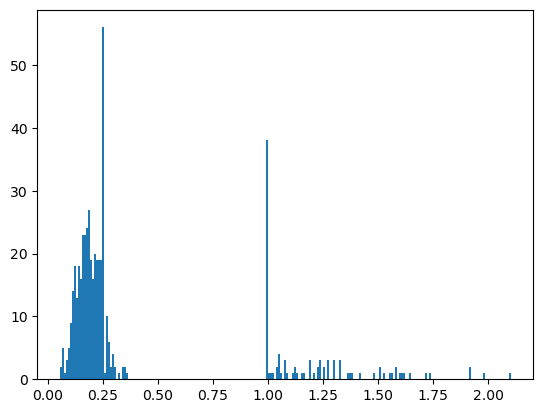

In [5]:
#d = np.concatenate(np.array(dother.value), np.array(dtumor.value))
d = [0] * (tumor+other)
for i in range(tumor):
    d[i] = dtumor.value[i]
for i in range(other):
    d[i+tumor] = dother.value[i]
plt.hist(d, bins=225)
plt.xticks(np.arange(0, 2.25, 0.25))
plt.show()

### Solving the (coverted) linear optimization problem

\begin{align*}
\min &~\sum_{i\notin \cal T} u_{i}\\
\text{s.t.} &~d = Ab\\
&~ d_{i}\ge D^{\text{target}}~\forall i\in\cal T\\
&~ 0\le b_{i} \le B^{\max} ~\forall 1\le i\le n\\
&~0 \le u_i \le d_{i}-D^{\text{other}} ~\forall 1\le i\le m, i\notin \cal T.
\end{align*}

In [6]:
u = cp.Variable(other, 'u')
dtumor = cp.Variable(tumor, 'dtumor')
dother = cp.Variable(other, 'dother')
b = cp.Variable(n, 'b')
f = cp.maximum(dother - Dother, 0)
obj = cp.sum(f)
cons = [Aother @ b == dother, Atumor @ b == dtumor, dtumor >= Dtarget, b >= 0, Bmax >= b, u >= 0, u >= dother - Dother]
problem = cp.Problem(cp.Minimize(obj), cons)
problem.solve(verbose = True, solver = cp.ECOS)

                                     CVXPY                                     
                                     v1.4.2                                    
(CVXPY) Mar 19 06:40:33 PM: Your problem has 1200 variables, 7 constraints, and 0 parameters.
(CVXPY) Mar 19 06:40:33 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 19 06:40:33 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 19 06:40:33 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Mar 19 06:40:33 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 19 06:40:33 PM: Compiling problem (target solver=ECOS).
(C

1.3882005424141164

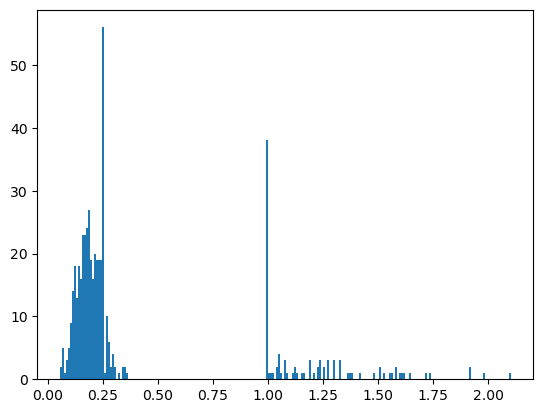

In [7]:
#d = np.concatenate(np.array(dother.value), np.array(dtumor.value))
d = [0] * (tumor+other)
for i in range(tumor):
    d[i] = dtumor.value[i]
for i in range(other):
    d[i+tumor] = dother.value[i]
plt.hist(d, bins=225)
plt.xticks(np.arange(0, 2.25, 0.25))
plt.show()

So both of these optimization problems give the same solution.